In [1]:
import sys
import matplotlib.pyplot as plt
import vaex
import os
import numpy as np
import pandas as pd
from helpers import *
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
current_dir  = os.getcwd()
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
ticker_list = os.listdir(os.path.join(current_dir,"data","clean","flash_crash"))
if '.DS_Store' in ticker_list : ticker_list.remove('.DS_Store')
#Filter the period of the crash
crash_start_date = '2010-05-03'
crash_end_date = '2010-05-14'
ticker_list

['GS.N-2010',
 'AAPL.OQ-2010',
 'HD.N-2010',
 'DOW.N-2010',
 'PG.N-2010',
 'NKE.N-2010',
 'MSFT.OQ-2010',
 'AMGN.OQ-2010']

### Response Function

#### a) Apple 

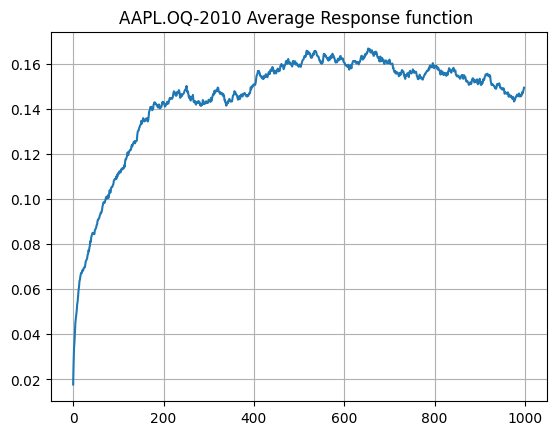

In [3]:
## Inspecting crash day
ticker_name = ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))

df = df[(df['index'] >= crash_start_date) & (df['index'] <= crash_end_date)]
tau = 1000
df_copy = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")].copy()
df_copy = setup_response_function_data(df_copy)
# plt.plot(compute_response_c(df_copy, tau=tau), label='Response Function')

plt.plot(compute_response(df_copy, tau_max=tau)[0], label='Response Function')
plt.title(ticker_name + " Average Response function ")
plt.grid()

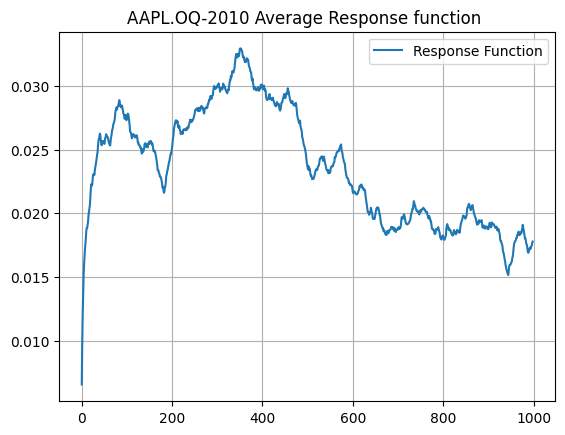

In [4]:
## Inspecting Normal day
ticker_name = ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))
df = df[(df['index'] >= "2010-05-05") & (df['index'] <= "2010-05-06")].copy()
# Convert Vaex dataframe to Pandas for easier manipulation
df_pandas = df.to_pandas_df()


df_pandas = setup_response_function_data(df_pandas)
tau = 1000
df_pandas.dropna(subset=['trade_class'],inplace=True)
plt.plot(compute_response(df_pandas, tau_max=tau)[0], label='Response Function')
# plt.plot(pd.Series(compute_response(df_pandas, tau_max=tau)[0]).rolling(window=100).aggregate(np.nanmean), label='Average Window')
plt.legend()
plt.title(ticker_name + " Average Response function ")
plt.grid()

Text(0.5, 1.0, 'MSFT.OQ-2010 Average Response function ')

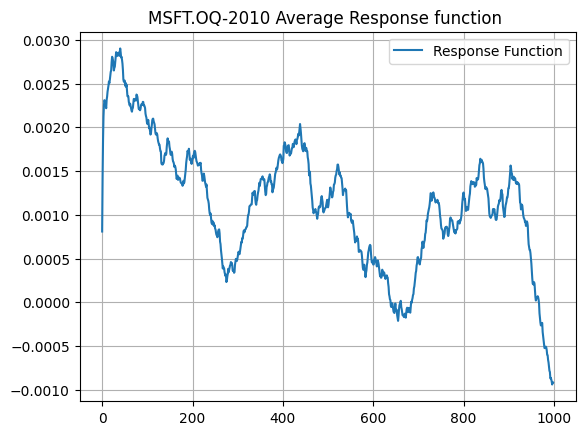

In [6]:
## Inspecting Normal day
ticker_name = ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))
df = df[(df['index'] >= "2010-05-05") & (df['index'] <= "2010-05-06")].copy()
# Convert Vaex dataframe to Pandas for easier manipulation
df_pandas = df.to_pandas_df()

df_pandas = setup_response_function_data(df_pandas)
tau = 1000
df_pandas.dropna(subset=['trade_class'],inplace=True)
plt.plot(compute_response(df_pandas, tau_max=tau)[0], label='Response Function')
# plt.plot(pd.Series(compute_response(df_pandas, tau_max=tau)[0]).rolling(window=100).aggregate(np.nanmean), label='Average Window')
plt.legend()
plt.grid()
plt.title(ticker_name + " Average Response function ")

Text(0.5, 1.0, 'MSFT.OQ-2010 Average Response function ')

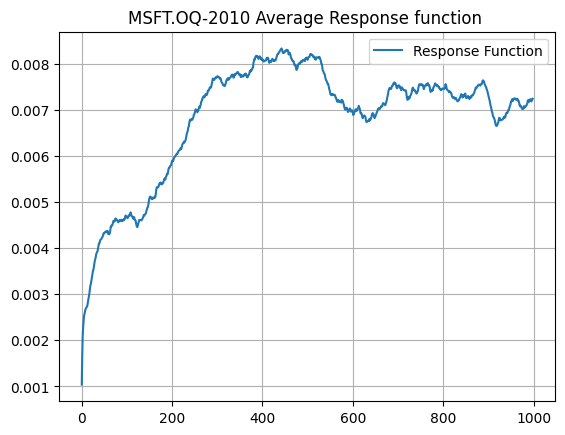

In [7]:
## Inspecting Crash day
ticker_name = ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df=vaex.open(os.path.join(file_dir,file_name))
df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")].copy()
# Convert Vaex dataframe to Pandas for easier manipulation
df_pandas = df.to_pandas_df()


df_pandas = setup_response_function_data(df_pandas)
tau = 1000
df_pandas.dropna(subset=['trade_class'],inplace=True)
plt.plot(compute_response(df_pandas, tau_max=tau)[0], label='Response Function')
# plt.plot(pd.Series(compute_response(df_pandas, tau_max=tau)[0]).rolling(window=100).aggregate(np.nanmean), label='Average Window')
plt.legend()
plt.grid()
plt.title(ticker_name + " Average Response function ")

### Plots on 3 days interval

In [9]:
def plot_3day_response_functions(df, tau_max=1000, ticker="", start_date='2010-05-05'):
    end_date = pd.to_datetime(start_date) + pd.DateOffset(days=3)
    end_date = end_date.strftime('%Y-%m-%d')
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.index >= start_date) & (df_filtered.index <= end_date)]
    df_filtered = setup_response_function_data(df_filtered)
    _, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i in range(3):
        start = pd.to_datetime(start_date) + pd.DateOffset(days=i)
        end = pd.to_datetime(start) + pd.DateOffset(days=1)
        start = start.strftime('%Y-%m-%d')
        end = end.strftime('%Y-%m-%d')
        df_day = df_filtered.copy()
        df_day = df_day[(df_day.index >= start) & (df_day.index <= end)]
        R = compute_response(df_day, tau_max)[0]

        # Fit OLS/linear regression on R
        X = np.arange(len(R)).reshape(-1, 1)
        X = sm.add_constant(X)
        model = sm.OLS(R, X)
        results = model.fit()
        predictions = results.predict(X)

        ax[i].plot(R)
        ax[i].plot(predictions, linestyle='--', color='red')
        ax[i].set_xlabel('Tau')
        ax[i].set_ylabel('R(tau)')
        ax[i].set_title(ticker + ' Average Response Function' + f' {start}')
        ax[i].grid()
    plt.tight_layout()
    plt.show()

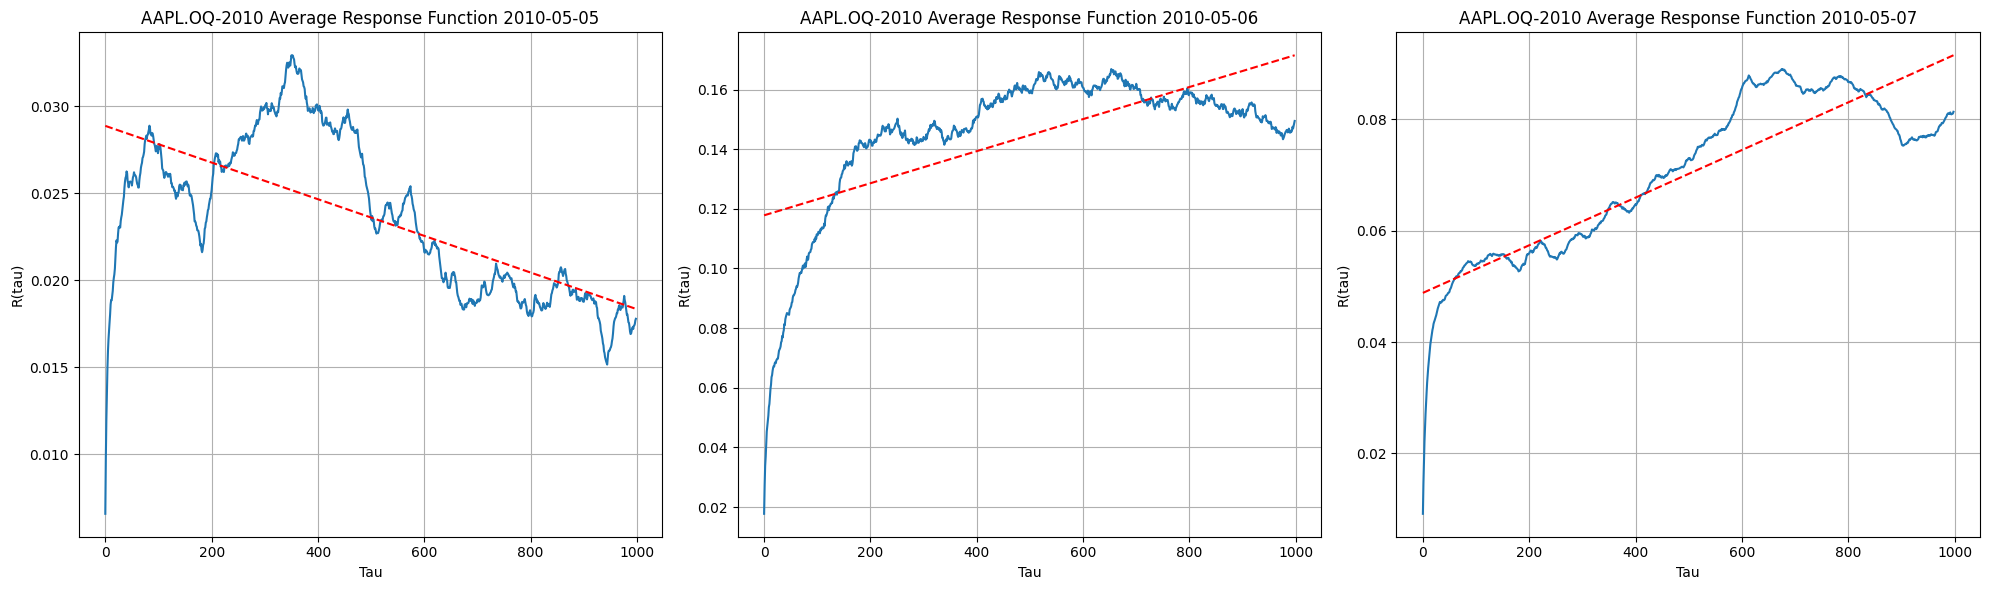

In [10]:
ticker_name =  ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

start_date = '2010-05-05'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=20)
end_date = end_date.strftime('%Y-%m-%d')
df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]

plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #crash day

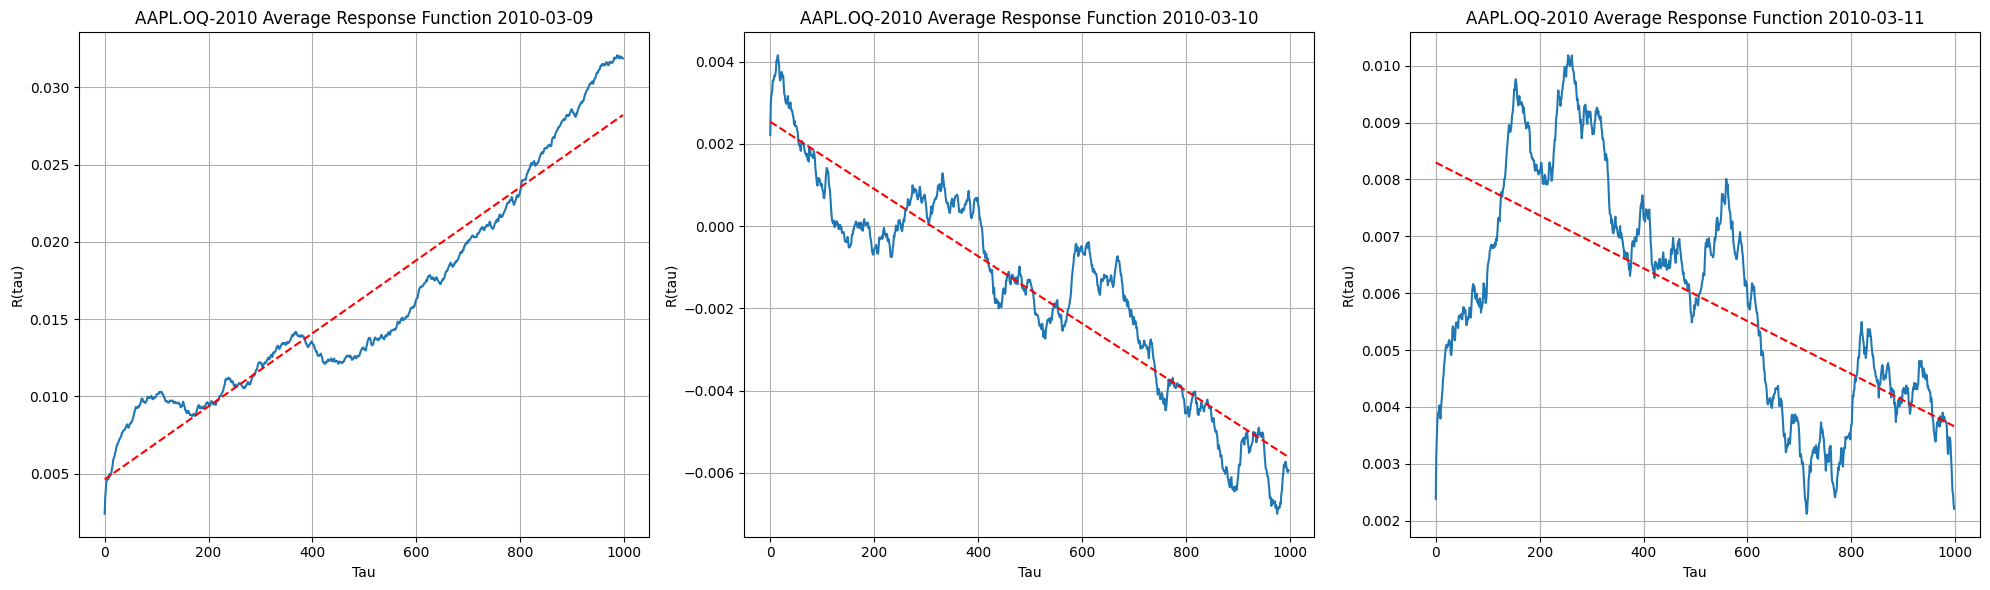

In [11]:
#Normal Week
ticker_name =  ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
start_date = '2010-03-09'
plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #normal day

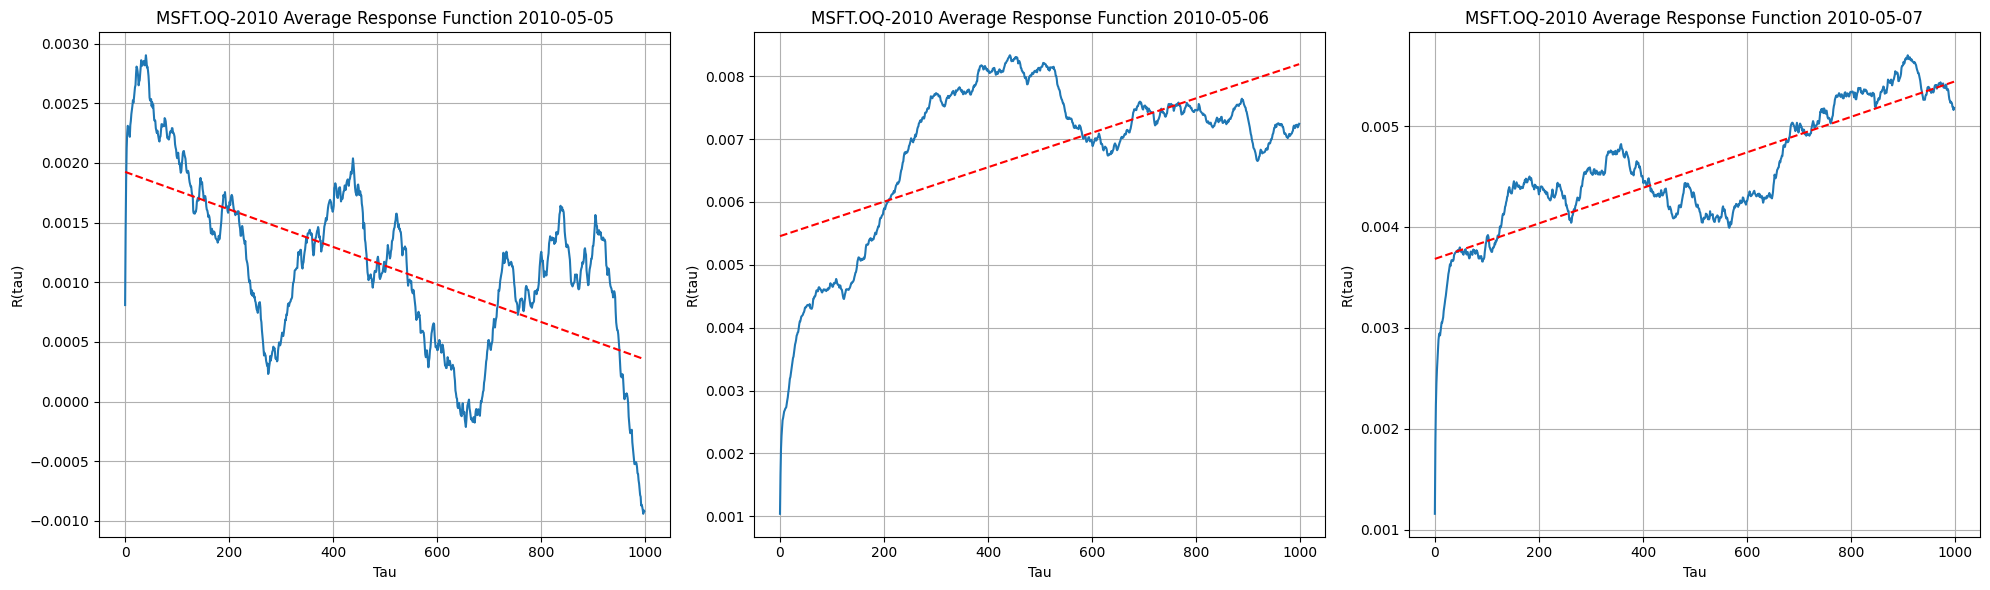

In [12]:
ticker_name =  ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

start_date = '2010-05-05'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=20)
end_date = end_date.strftime('%Y-%m-%d')
df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]

plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #crash day

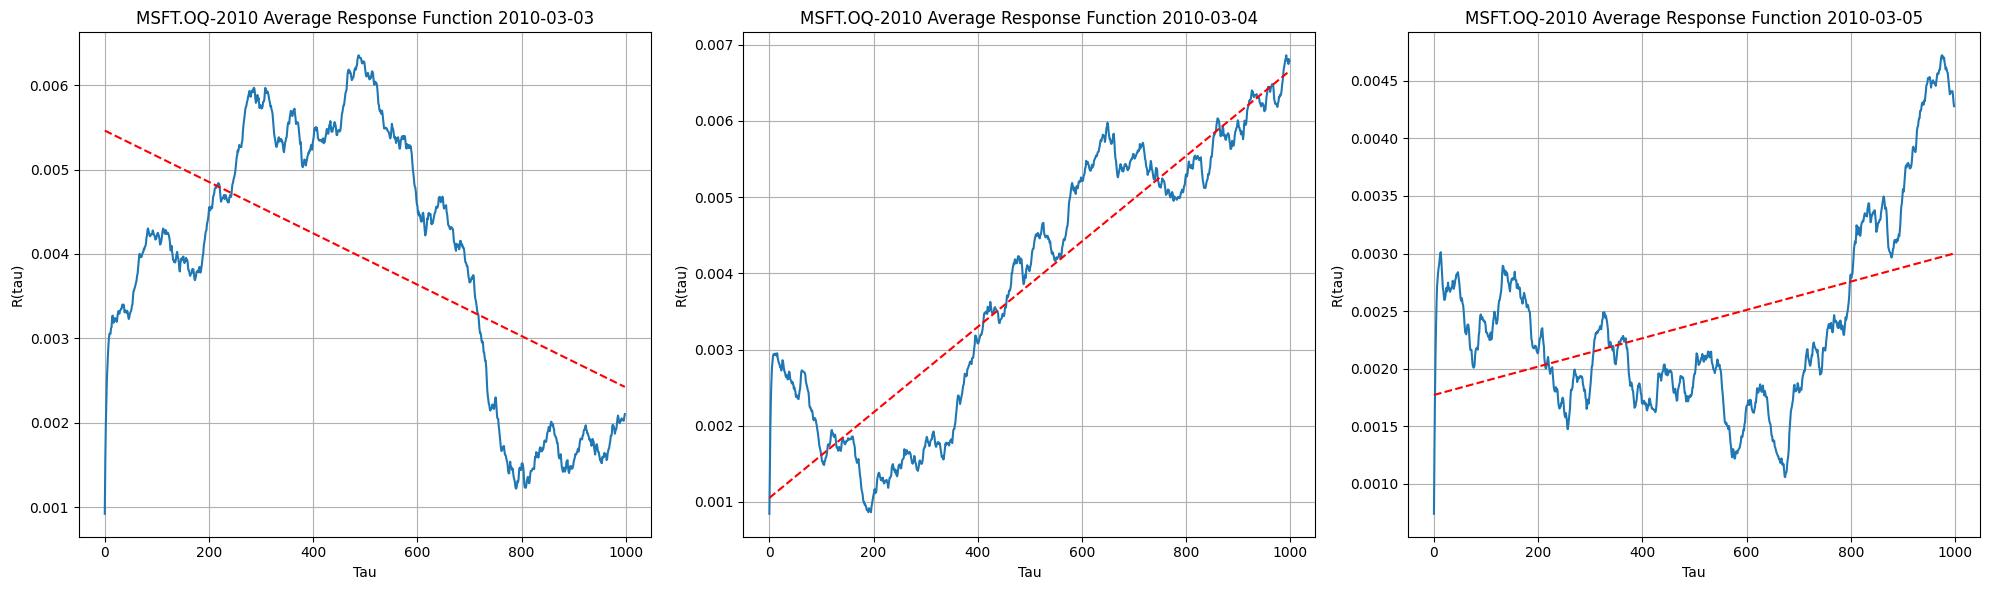

In [13]:
#Normal Week
ticker_name =  ticker_list[6]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
start_date = '2010-03-03'
plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #normal day

In [ ]:
# ticker_name =  ticker_list[7]
# plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
# file_dir = os.path.join(loading_dir,ticker_name)
# file_name = os.listdir(file_dir)[0]
# df = vaex.open(os.path.join(file_dir,file_name))
# tau_max = 1000

# start_date = '2010-05-04'
# end_date = pd.to_datetime(start_date) + pd.DateOffset(days=20)
# end_date = end_date.strftime('%Y-%m-%d')
# df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]

# plot_3day_response_functions(df, tau_max =tau_max, ticker = ticker_name,start_date=start_date) #crash day

### Standard deviation of the response function

#### - Apple

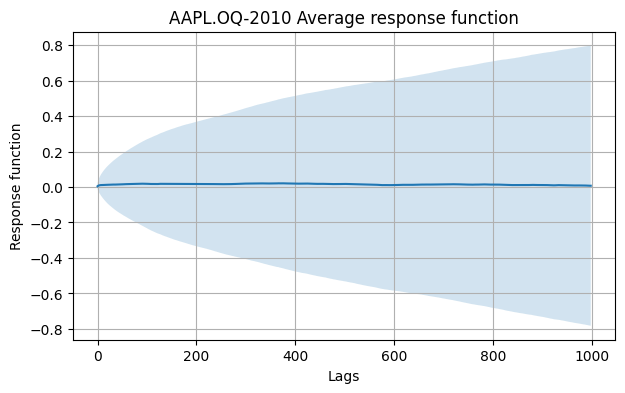

In [14]:
# Normal day
ticker_name =  ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-02-01") & (df['index'] <= "2010-02-02")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) #Normal day

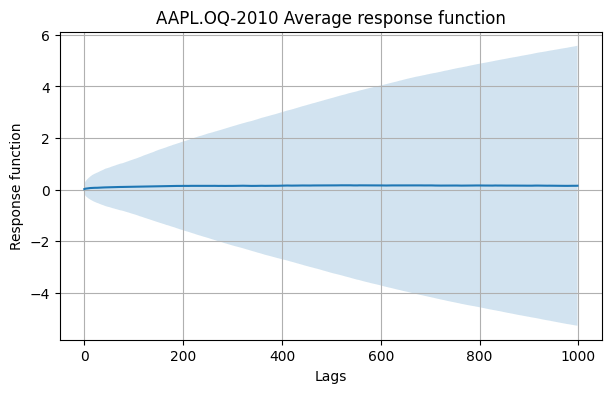

In [15]:
# Crash day
ticker_name =  ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) #Crash day

#### - Microsoft

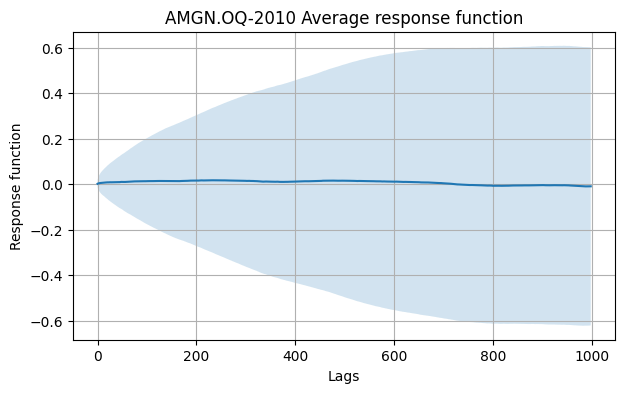

In [16]:
# Crash day
ticker_name =  ticker_list[7]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) #Crash day

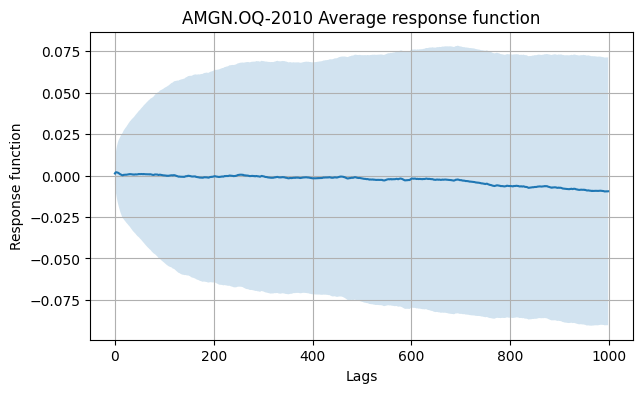

In [17]:
# Normal day
ticker_name =  ticker_list[7]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000
df = df[(df['index'] >= "2010-02-01") & (df['index'] <= "2010-02-02")]
plot_response_function(df, tau_max =tau_max, ticker = ticker_name,confidence_interval=True) # Crash day

#### Discussion : 
We can see that the volatility of the response is significantly larger during the crash day in both GS and MSFT tickers.

Discussion: We notice important trends in crash days as opposed to normal days:
- Spread always very big (max - min is magnitudes higher than normal) (always valid)
- More fluctuations 
- Min or Max not bounded (depends on the ticker)

#### a) Buy - Sell Response Function

In [18]:
def plot_3day_response_functions_split(df, tau_max =1000, ticker = "",start_date='2010-05-05'):
    end_date = pd.to_datetime(start_date) + pd.DateOffset(days=3)
    end_date = end_date.strftime('%Y-%m-%d')
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.index >= start_date) & (df_filtered.index <= end_date)]
    df_filtered = setup_response_function_data(df_filtered)
    fig,ax = plt.subplots(1, 3, figsize=(22, 8))
    
    for i in range(3):
        start = pd.to_datetime(start_date) + pd.DateOffset(days=i)
        end = pd.to_datetime(start) + pd.DateOffset(days=1)
        start = start.strftime('%Y-%m-%d')
        end = end.strftime('%Y-%m-%d')
        
        df_day = df_filtered.copy()
        df_day = df_day[(df_day.index >= start) & (df_day.index <= end)]

        # Group the DataFrame by hour and compute autocorrelation for each group
        for trade_class in df_day['trade_class'].unique():
            df_hour = df_day[df_day['trade_class'] == trade_class]
            df_hour_clean = df_hour.dropna(subset=['trade_class'])
            R = compute_response(df_hour_clean, tau_max)[0]
            ax[i].plot(R, label=f'Trade Class {trade_class}')
        ax[i].legend()
        ax[i].set_xlabel('Tau')
        ax[i].set_ylabel('R(tau)')
        ax[i].set_title(ticker + ' Average Response Function' + f' {start}')
        ax[i].grid()
    plt.tight_layout()
    plt.show()

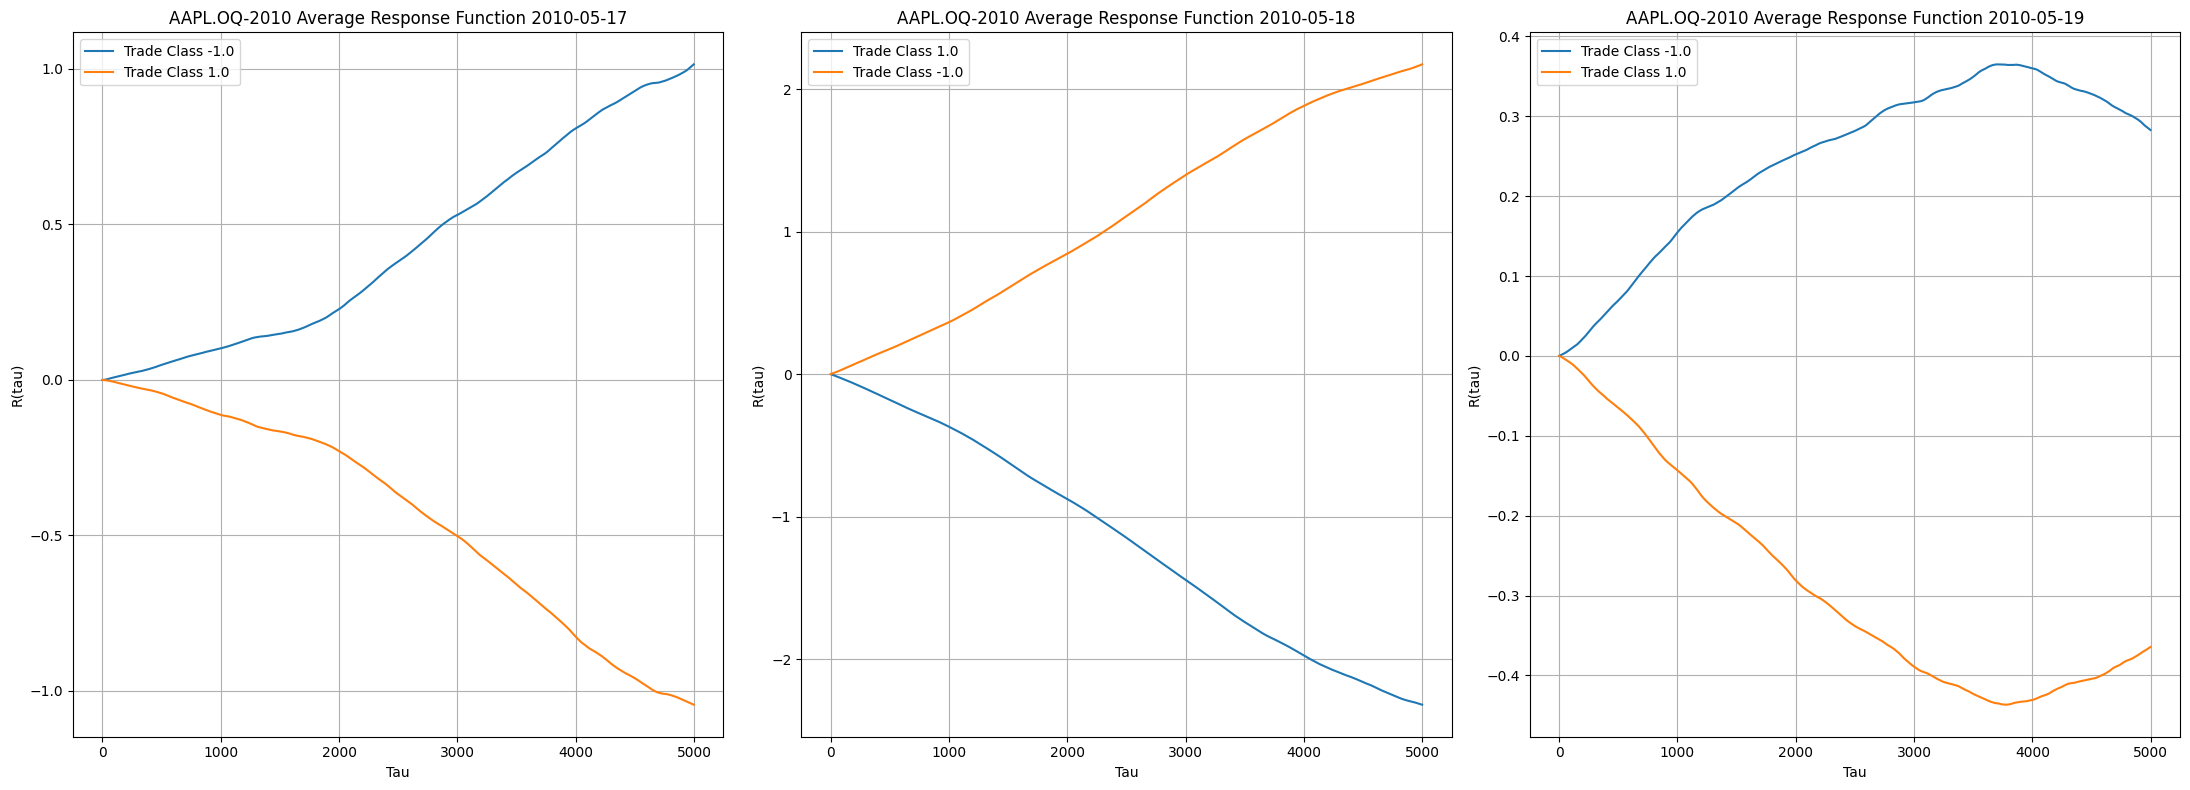

In [21]:
ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 5000

plot_3day_response_functions_split(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-17') #Crash day

In [ ]:
# plot_3day_response_functions_split(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-02-01') #normal day

#### b) By Hour

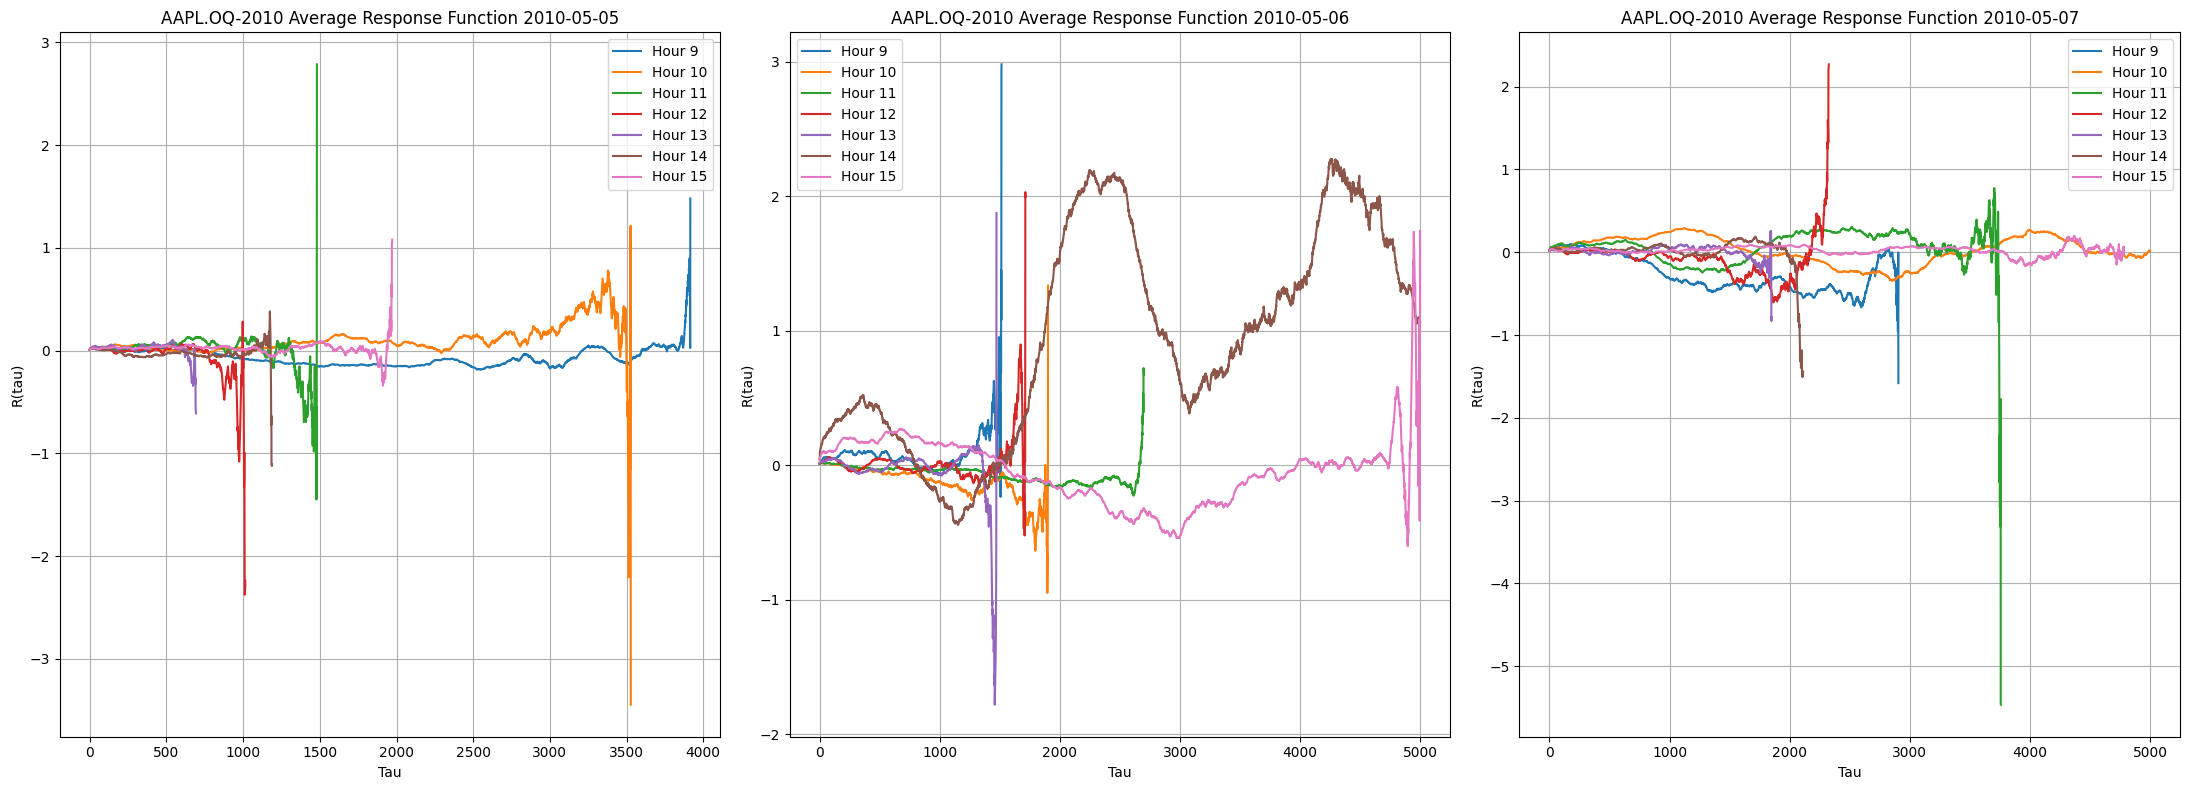

In [24]:
ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 5000
plot_3day_response_functions_hourly(df , tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05') #Crash day

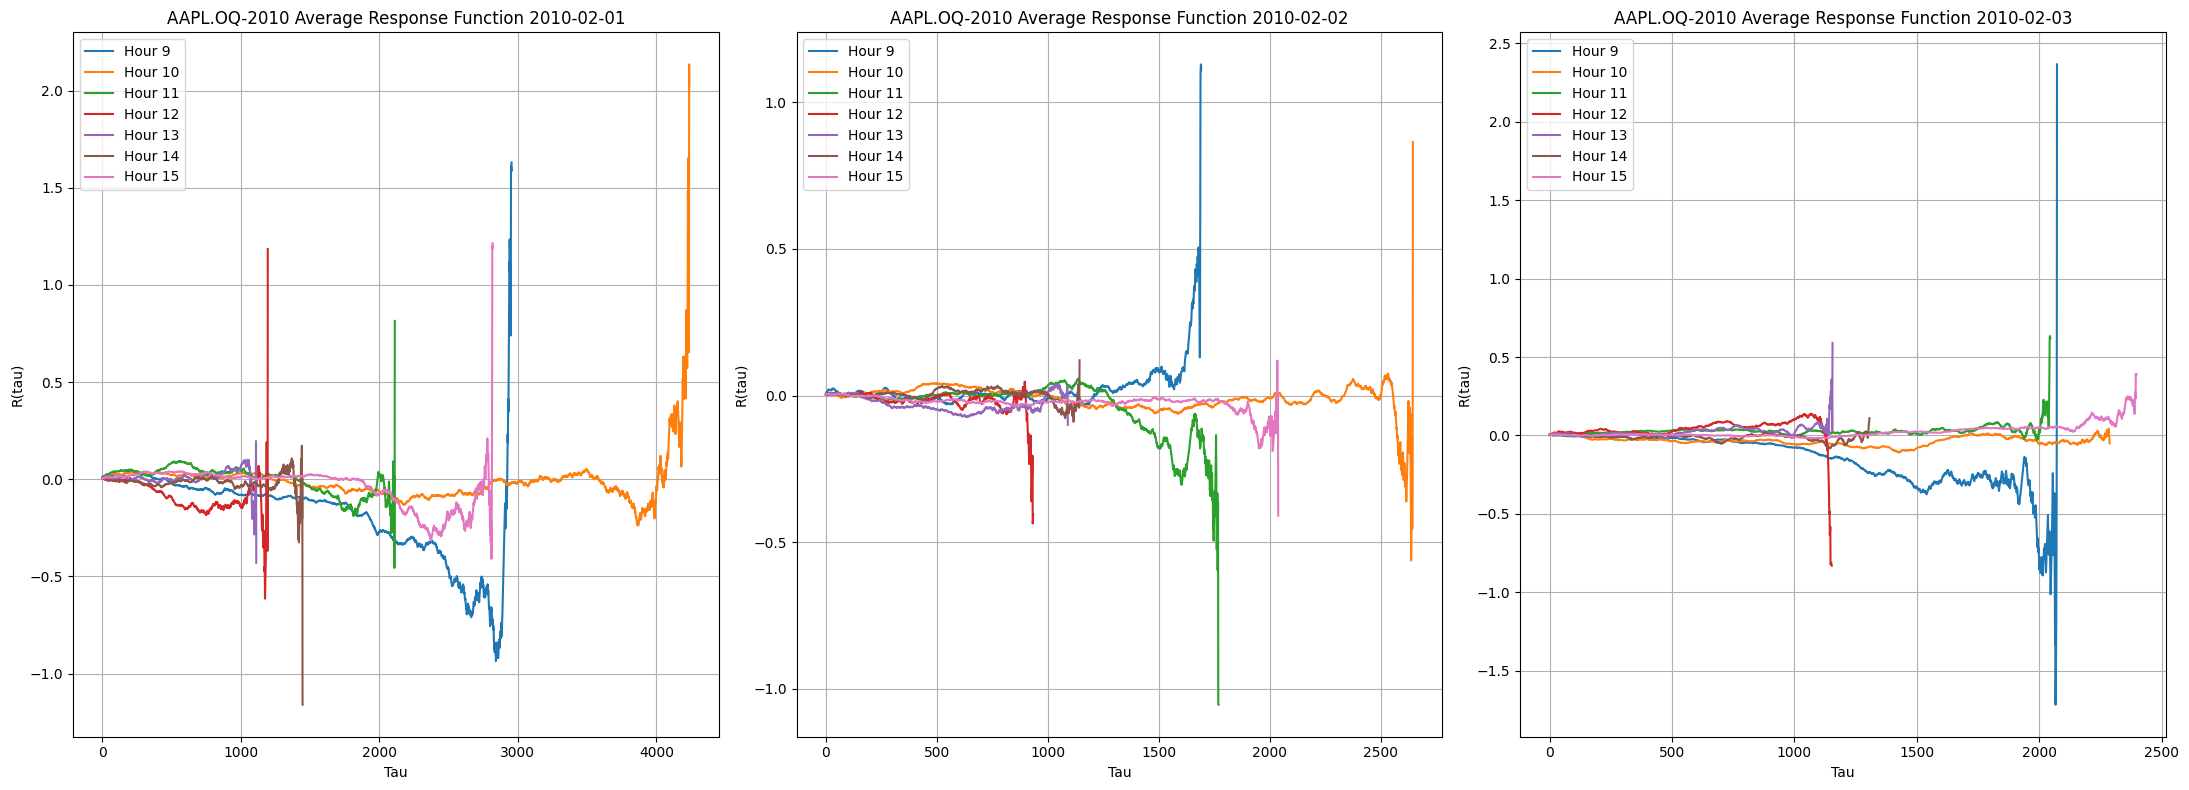

In [25]:
plot_3day_response_functions_hourly(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-02-01') #Normal day

#### c) By 15 minute intervals

In [28]:
def plot_3day_response_functions_15min(df, tau_max=1000, ticker="", start_date='2010-05-05'):
    end_date = pd.to_datetime(start_date) + pd.DateOffset(days=3)
    end_date = end_date.strftime('%Y-%m-%d')
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.index >= start_date) & (df_filtered.index <= end_date)]
    
    df_filtered = setup_response_function_data(df_filtered)
    # Create a Plotly subplot figure with 3 rows and 1 column
    fig = make_subplots(rows=3, cols=1, subplot_titles=[f'{ticker} Response Function {(pd.to_datetime(start_date) + pd.DateOffset(days=i))}' for i in range(3)])
    
    for i in range(3):
        start = pd.to_datetime(start_date).tz_localize('America/New_York') + pd.DateOffset(days=i)
        end = start + pd.DateOffset(days=1)
        df_day = df_filtered[(df_filtered.index >= start) & (df_filtered.index < end)]
        
        # Group the DataFrame by 15-minute intervals
        df_day_grouped = df_day.groupby(pd.Grouper(freq='15T'))
        
        for name, group in df_day_grouped:
            if not group.empty:
                group_clean = group.dropna(subset=['trade_class'])
                # Compute the average response function R(tau) for the group
                R ,R_std = compute_response(group_clean, tau_max)
                # Create a scatter plot for each group and add it to the corresponding subplot
                fig.add_trace(go.Scatter(x=list(range(len(R))), y=R, mode='lines', name=name.strftime('%H:%M')), row=i+1, col=1)
        
        # Update x-axis and y-axis labels
        fig.update_xaxes(title_text='Tau', row=i+1, col=1)
        fig.update_yaxes(title_text='R(tau)', row=i+1, col=1)

    # Update layout and show the figure
    fig.update_layout(height=1600, width=1200, title_text=f'{ticker} Response Functions', showlegend=True)
    fig.show()

In [37]:
def plot_3day_response_functions_15min(df, tau_max=1000, ticker="", start_date='2010-05-05'):
    end_date = pd.to_datetime(start_date) + pd.DateOffset(days=3)
    end_date = end_date.strftime('%Y-%m-%d')
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.index >= start_date) & (df_filtered.index <= end_date)]
    
    df_filtered = setup_response_function_data(df_filtered)
    # Create a Plotly subplot figure with 3 rows and 1 column
    fig = make_subplots(rows=1, cols=1, subplot_titles=[f'{ticker} Response Function {(pd.to_datetime(start_date) + pd.DateOffset(days=i))}' for i in range(3)])
    
    for i in range(1):
        start = pd.to_datetime(start_date).tz_localize('America/New_York') + pd.DateOffset(days=i)
        end = start + pd.DateOffset(days=1)
        df_day = df_filtered[(df_filtered.index >= start) & (df_filtered.index < end)]
        
        # Group the DataFrame by 15-minute intervals
        df_day_grouped = df_day.groupby(pd.Grouper(freq='15T'))
        
        for name, group in df_day_grouped:
            if not group.empty:
                group_clean = group.dropna(subset=['trade_class'])
                # Compute the average response function R(tau) for the group
                R ,R_std = compute_response(group_clean, tau_max)
                # Create a scatter plot for each group and add it to the corresponding subplot
                name = name.strftime('%H:%M')
                if name.endswith(':30') or name.endswith(':00'):
                    fig.add_trace(go.Scatter(x=list(range(len(R))), y=R, mode='lines', name=name), row=i+1, col=1)
                # fig.add_trace(go.Scatter(x=list(range(len(R))), y=R, mode='lines', name=name.strftime('%H:%M')), row=i+1, col=1)
        
        # Update x-axis and y-axis labels
        fig.update_xaxes(title_text='Tau', row=i+1, col=1)
        fig.update_yaxes(title_text='R(tau)', row=i+1, col=1)

    # Update layout and show the figure
    fig.update_layout(height=800, width=1200, title_text=f'{ticker} Response Functions', showlegend=True)
    fig.show()

In [39]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_15min(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05')

In [38]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ticker_name =   ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_15min(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-06')

In [40]:
ticker_name =   ticker_list[6]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

plot_3day_response_functions_15min(df, tau_max =tau_max, ticker = ticker_name,start_date='2010-05-05')

#### Market Response as a function of volume trade

Text(0.5, 1.0, 'AAPL.OQ-2010 Average response function R(1,V)')

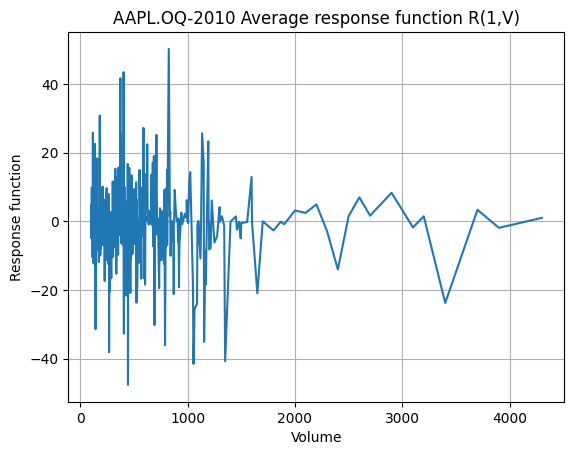

In [41]:
ticker_name =  ticker_list[1]
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))

df = df[(df['index'] >= "2010-05-05") & (df['index'] <= "2010-05-06")] #Normal day
df = setup_response_function_data(df)
tau = 1
R = compute_response_volume(df, tau=tau)
R = sorted(R, key=lambda x: x[0])
R = [(volume, R_tau) for volume, R_tau in R if not np.isnan(R_tau)]
x = [i[0] for i in R]
y = [i[1] for i in R]
plt.plot(x, y)
plt.xlabel('Volume')
plt.ylabel('Response function')
plt.grid()
plt.title(ticker_name + f' Average response function R({tau},V)')

Text(0.5, 1.0, 'AAPL.OQ-2010 Average response function R(1,V)')

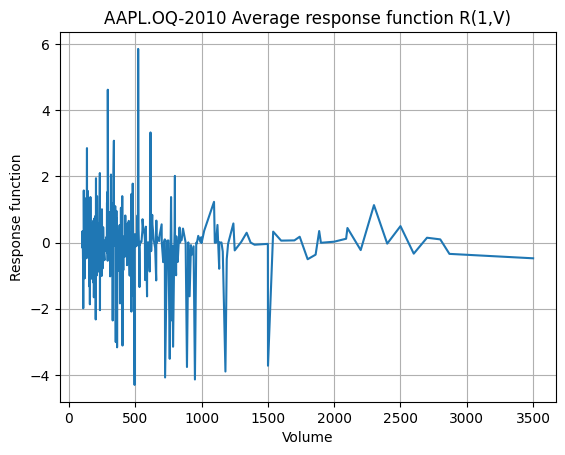

In [42]:
ticker_name =  ticker_list[1]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))

df = df[(df['index'] >= "2010-02-02") & (df['index'] <= "2010-02-03")] #Crash day
df = setup_response_function_data(df)
tau = 1
R = compute_response_volume(df, tau=tau)
R = sorted(R, key=lambda x: x[0])
R = [(volume, R_tau) for volume, R_tau in R if not np.isnan(R_tau)]
x = [i[0] for i in R]
y = [i[1] for i in R]
plt.plot(x, y)
plt.xlabel('Volume')
plt.ylabel('Response function')
plt.grid()
plt.title(ticker_name + f' Average response function R({tau},V)')

Discussion : 
Even though there is no clear pattern, we can notice the huge difference in magnitude between the normal day and the crash day.

#### e) ECDF of Response Function

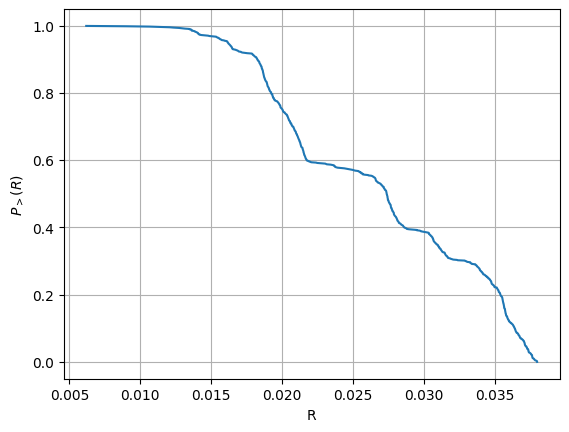

In [43]:
#Crash day
ticker_name =  ticker_list[0]
loading_dir = os.path.join(current_dir,"data","clean", "flash_crash")
plots_dir = os.path.join(current_dir,"plots","flash_crash",ticker_name)
file_dir = os.path.join(loading_dir,ticker_name)
file_name = os.listdir(file_dir)[0]
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

df = df[(df['index'] >= "2010-05-06") & (df['index'] <= "2010-05-07")]
df = setup_response_function_data(df)
R,_ = compute_response(df, tau_max)

x=R
ecdf_r=ECDF(x)
plt.plot(ecdf_r.x,1-ecdf_r.y)
plt.xlabel("R")
plt.ylabel("$P_>(R)$")
plt.grid()
plt.show()

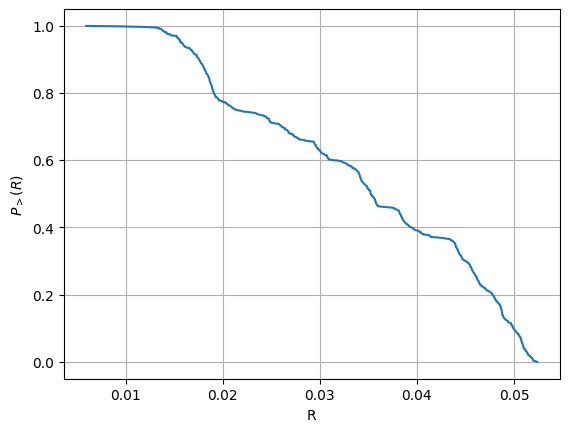

In [44]:
df = vaex.open(os.path.join(file_dir,file_name))
tau_max = 1000

df = df[(df['index'] >= "2010-02-01") & (df['index'] <= "2010-02-02")]
df = setup_response_function_data(df)
R,_ = compute_response(df, tau_max)
x=R
ecdf_r=ECDF(x)
plt.plot(ecdf_r.x,1-ecdf_r.y)
plt.xlabel("R")
plt.ylabel("$P_>(R)$")
plt.grid()
plt.show()

#### Discussion :
The plot of ECDF further demonstrates the significance of the response function magnitude during a crash day.

#### Conclusion :
From the previous data analysis, we established some trends in market response functions that we will use later on to predict a flash crash. 